<a href="https://colab.research.google.com/github/SukanyaPathak2904/Black_Friday_sales_prediction/blob/main/blackfriday2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lazypredict

**Ways to solve the below dataset:**

*  lazy predict
*   xgbregressor
* histgradientregressoe
* gradientregressor
* by deleting the product3 category

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns
#import lazypredict

In [ ]:
dftest= pd.read_csv('/content/drive/MyDrive/BF_test.csv')
dftrain= pd.read_csv('/content/drive/MyDrive/BF_train.csv')

In [ ]:
#dftrain = dftrain.iloc[:233599, :]

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
print(len(dftrain))
print(len(dftest))

550068
233599


In [ ]:
print(dftrain.shape)
print(dftest.shape)

(550068, 12)
(233599, 11)


In [ ]:
dftrain.isnull().sum().sort_values(ascending=False)

Product_Category_3            383247
Product_Category_2            173638
Purchase                           0
Product_Category_1                 0
Marital_Status                     0
Stay_In_Current_City_Years         0
City_Category                      0
Occupation                         0
Age                                0
Gender                             0
Product_ID                         0
User_ID                            0
dtype: int64

In [ ]:
dftest.isnull().sum().sort_values(ascending=False)

Product_Category_3            162562
Product_Category_2             72344
Product_Category_1                 0
Marital_Status                     0
Stay_In_Current_City_Years         0
City_Category                      0
Occupation                         0
Age                                0
Gender                             0
Product_ID                         0
User_ID                            0
dtype: int64

In [ ]:
df= pd.concat([dftrain,dftest],axis=0)

In [ ]:
df.shape

(467198, 12)

In [ ]:
df['Product_Category_2'].head()

0     NaN
1     6.0
2     NaN
3    14.0
4     NaN
Name: Product_Category_2, dtype: float64

In [ ]:
df['Product_Category_3'].head()

0     NaN
1    14.0
2     NaN
3     NaN
4     NaN
Name: Product_Category_3, dtype: float64

In [ ]:
df['Product_Category_1'].head()

0     3
1     1
2    12
3    12
4     8
Name: Product_Category_1, dtype: int64

In [ ]:
df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0],inplace=True)
df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0],inplace=True)

In [ ]:
#dftrain_cleaned = df.iloc[:550068,:]
dftrain_cleaned = dftrain.iloc[:550068,:]
dftest_cleaned = dftrain.iloc[550068: ,:]

In [ ]:
dftrain_cleaned.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [ ]:
dftest_cleaned.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

In [ ]:
dftrain_cleaned.head()

In [ ]:
df['Age']= df['Age'].apply(lambda x: str(x).replace('0-17','17')if '0-17' in str(x) else str(x))
df['Age']= df['Age'].apply(lambda x: str(x).replace('18-25','25')if '18-25' in str(x) else str(x))
df['Age']= df['Age'].apply(lambda x: str(x).replace('26-35','35')if '26-35' in str(x) else str(x))
df['Age']= df['Age'].apply(lambda x: str(x).replace('36-45','45')if '36-45' in str(x) else str(x))
df['Age']= df['Age'].apply(lambda x: str(x).replace('46-50','50')if '46-50' in str(x) else str(x))
df['Age']= df['Age'].apply(lambda x: str(x).replace('51-55','55')if '51-55' in str(x) else str(x))
df['Age']= df['Age'].apply(lambda x: str(x).replace('55+','60')if '55+' in str(x) else str(x))

df['Stay_In_Current_City_Years']= df['Stay_In_Current_City_Years'].apply(lambda x: str(x).replace('4+','4') if '4+' in str(x) else str(x))

In [ ]:
df.iloc[233590:233599]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
233590,1006018,P00120042,M,36-45,1,C,3,0,1,2.0,NaN,11988.0
233591,1006018,P00111142,M,36-45,1,C,3,0,1,15.0,16.0,15658.0
233592,1006018,P00016742,M,36-45,1,C,3,0,1,15.0,16.0,12068.0
233593,1006019,P00000242,M,26-35,0,A,4+,0,2,4.0,9.0,13040.0
233594,1006020,P00108842,M,51-55,16,A,1,1,5,15.0,NaN,6862.0
233595,1006021,P00110942,M,26-35,12,B,2,1,1,2.0,NaN,18984.0
233596,1006021,P00237542,M,26-35,12,B,2,1,1,15.0,16.0,19298.0
233597,1006021,P00318742,M,26-35,12,B,2,1,1,8.0,NaN,11937.0
233598,1006021,P00217942,M,26-35,12,B,2,1,5,NaN,NaN,3554.0


In [ ]:
df.drop('Product_Category_3',axis=1,inplace=True)

In [ ]:
dftrain_cleaned = df.iloc[:550068,:]
dftest_cleaned = df.iloc[550068: ,:]

In [ ]:
dftrain_cleaned = df.iloc[:233599,:]
dftest_cleaned = df.iloc[233599: ,:]


##dftrain_cleaned = dftrain.iloc[:250000,:]
#dftest_cleaned = df.iloc[250000: ,:]


In [ ]:
dftrain_cleaned.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,17,10,A,2,0,3,8.0,8370.0
1,1000001,P00248942,F,17,10,A,2,0,1,6.0,15200.0
2,1000001,P00087842,F,17,10,A,2,0,12,8.0,1422.0
3,1000001,P00085442,F,17,10,A,2,0,12,14.0,1057.0
4,1000002,P00285442,M,60,16,C,4,0,8,8.0,7969.0


In [ ]:
core = pd.Series.sort_values(dftrain_cleaned.corrwith(dftrain_cleaned['Purchase']))
#core= pd.Series.sort_values(dftrain.corrwith(dftrain.SalePrice))
print(core.sort_values(ascending=False))

Purchase              1.000000
Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_2   -0.128651
Product_Category_3   -0.185945
Product_Category_1   -0.343703
dtype: float64


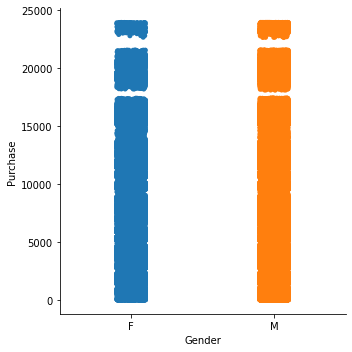

In [ ]:
sns.catplot(x= 'Gender',y= 'Purchase', data= dftrain_cleaned)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          783667 non-null  float64
 10  Product_Category_3          783667 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [ ]:
df['Product_Category_2']= pd.to_numeric(df['Product_Category_2'], downcast='signed')

In [ ]:
#df['Product_Category_3'] = pd.to_numeric(df['Product_Category_3'],  downcast='signed')

In [ ]:
df['Purchase'] = pd.to_numeric(df['Purchase'], downcast='integer')

In [ ]:
df['Purchase'] = df['Purchase'].values.astype(np.int64)

In [ ]:
df.iloc[:233599,-1].astype('int64')

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,17,10,A,2,0,3,8,8370
1,1000001,P00248942,F,17,10,A,2,0,1,6,15200
2,1000001,P00087842,F,17,10,A,2,0,12,8,1422
3,1000001,P00085442,F,17,10,A,2,0,12,14,1057
4,1000002,P00285442,M,60,16,C,4,0,8,8,7969


In [ ]:
#df['Product_ID'] = pd.to_numeric(df['Product_ID'], downcast='signed')
df['Age'] = pd.to_numeric(df['Age'], downcast = 'signed')
df['Stay_In_Current_City_Years'] = pd.to_numeric(df['Stay_In_Current_City_Years'], downcast = 'signed')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467198 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     467198 non-null  int64 
 1   Product_ID                  467198 non-null  object
 2   Gender                      467198 non-null  object
 3   Age                         467198 non-null  int8  
 4   Occupation                  467198 non-null  int64 
 5   City_Category               467198 non-null  object
 6   Stay_In_Current_City_Years  467198 non-null  int8  
 7   Marital_Status              467198 non-null  int64 
 8   Product_Category_1          467198 non-null  int64 
 9   Product_Category_2          467198 non-null  int8  
 10  Purchase                    467198 non-null  int64 
dtypes: int64(5), int8(3), object(3)
memory usage: 33.4+ MB


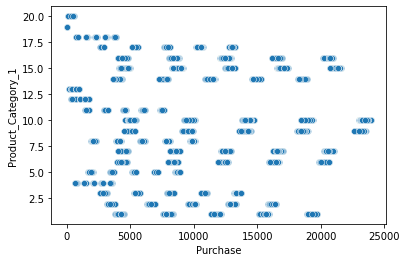

In [ ]:
sns.scatterplot(x = dftrain_cleaned.Purchase, y= dftrain_cleaned.Product_Category_1, data= dftrain_cleaned)

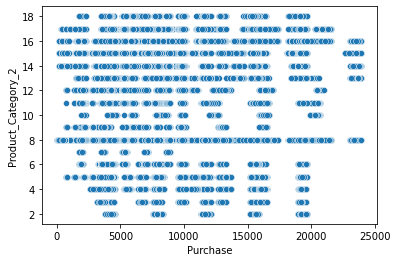

In [ ]:
sns.scatterplot(x = dftrain_cleaned.Purchase, y= dftrain_cleaned.Product_Category_2, data= dftrain_cleaned)

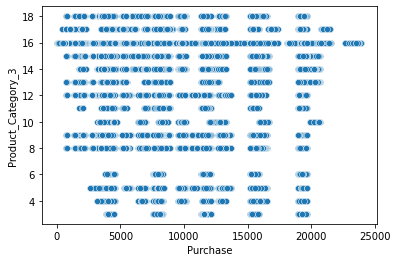

In [ ]:
sns.scatterplot(x = dftrain_cleaned.Purchase, y= dftrain_cleaned.Product_Category_3, data= dftrain_cleaned)

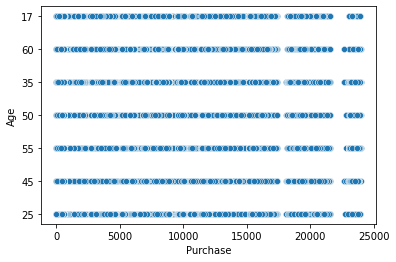

In [ ]:
sns.scatterplot(x = dftrain_cleaned.Purchase, y= dftrain_cleaned.Age, data= dftrain_cleaned)

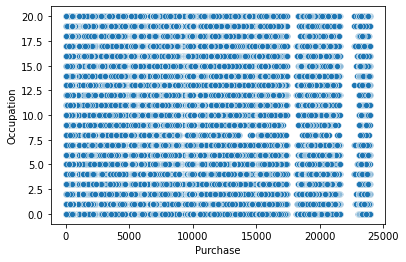

In [ ]:
sns.scatterplot(x = dftrain_cleaned.Purchase, y= dftrain_cleaned.Occupation, data= dftrain_cleaned)

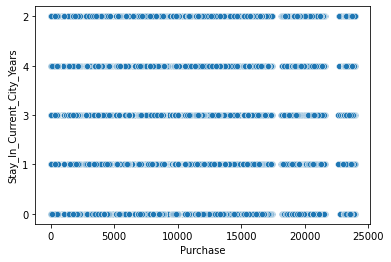

In [ ]:
sns.scatterplot(x = dftrain_cleaned.Purchase, y= dftrain_cleaned.Stay_In_Current_City_Years, data= dftrain_cleaned)

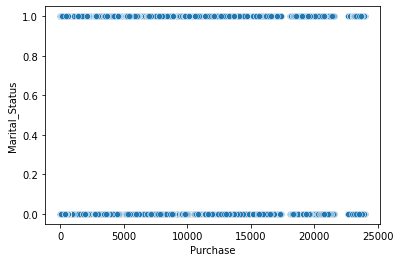

In [ ]:
sns.scatterplot(x = dftrain_cleaned.Purchase, y= dftrain_cleaned.Marital_Status, data= dftrain_cleaned)

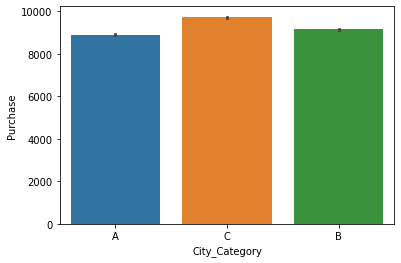

In [ ]:
sns.barplot(x = dftrain_cleaned['City_Category'],y= dftrain_cleaned['Purchase'],data= dftrain_cleaned)

In [ ]:
core = pd.Series.sort_values(dftrain_cleaned.corrwith(dftrain_cleaned['Purchase']))
#core= pd.Series.sort_values(dftrain.corrwith(dftrain.SalePrice))
print(core.sort_values(ascending=False))

Purchase              1.000000
Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_2   -0.128651
Product_Category_3   -0.185945
Product_Category_1   -0.343703
dtype: float64


In [ ]:
core = pd.Series.sort_values(dftrain_cleaned.corrwith(dftrain_cleaned['Product_Category_2']))
#core= pd.Series.sort_values(dftrain.corrwith(dftrain.SalePrice))
print(core.sort_values(ascending=False))

Product_Category_2    1.000000
Product_Category_3    0.463188
Product_Category_1    0.279247
Marital_Status        0.010260
User_ID               0.002065
Occupation            0.001566
Purchase             -0.128651
dtype: float64


In [ ]:
core = pd.Series.sort_values(dftrain_cleaned.corrwith(dftrain_cleaned['Product_Category_3']))
#core= pd.Series.sort_values(dftrain.corrwith(dftrain.SalePrice))
print(core.sort_values(ascending=False))

Product_Category_3    1.000000
Product_Category_2    0.463188
Product_Category_1    0.317944
Marital_Status        0.013978
Occupation            0.000246
User_ID              -0.000186
Purchase             -0.185945
dtype: float64


In [ ]:
core = pd.Series.sort_values(dftrain_cleaned.corrwith(dftrain_cleaned['Product_Category_1']))
#core= pd.Series.sort_values(dftrain.corrwith(dftrain.SalePrice))
print(core.sort_values(ascending=False))

Product_Category_1    1.000000
Product_Category_3    0.317944
Product_Category_2    0.279247
Marital_Status        0.019888
User_ID               0.003825
Occupation           -0.007618
Purchase             -0.343703
dtype: float64


In [ ]:
core = pd.Series.sort_values(df.corrwith(df['Product_Category_1']))
#core= pd.Series.sort_values(dftrain.corrwith(dftrain.SalePrice))
print(core.sort_values(ascending=False))

Product_Category_1            1.000000
Product_Category_3            0.286502
Product_Category_2            0.286502
Age                           0.059662
Marital_Status                0.019579
User_ID                       0.004568
Stay_In_Current_City_Years   -0.003518
Occupation                   -0.008441
Purchase                     -0.343703
dtype: float64


In [ ]:
core = pd.Series.sort_values(df.corrwith(df['Product_Category_3']))
#core= pd.Series.sort_values(dftrain.corrwith(dftrain.SalePrice))
print(core.sort_values(ascending=False))

Product_Category_3            1.000000
Product_Category_2            1.000000
Product_Category_1            0.286502
Age                           0.042555
Marital_Status                0.012192
User_ID                       0.002545
Occupation                    0.001501
Stay_In_Current_City_Years   -0.000081
Purchase                     -0.128651
dtype: float64


In [ ]:
core = pd.Series.sort_values(df.corrwith(df['Product_Category_2']))
#core= pd.Series.sort_values(dftrain.corrwith(dftrain.SalePrice))
print(core.sort_values(ascending=False))

Product_Category_3            1.000000
Product_Category_2            1.000000
Product_Category_1            0.286502
Age                           0.042555
Marital_Status                0.012192
User_ID                       0.002545
Occupation                    0.001501
Stay_In_Current_City_Years   -0.000081
Purchase                     -0.128651
dtype: float64


In [ ]:
a['Purchase'].max()

23955.0

In [ ]:
a['Purchase'].min()

12.0

In [ ]:
df.loc[(df['Purchase'] <=12)]

In [ ]:
df['Product_ID'].nunique()

3677

In [ ]:
df['Purchase'].max()

23961.0

In [ ]:
df['Purchase'].min()

12.0

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [ ]:
df['city_Types_Cat'] = labelencoder.fit_transform(df['City_Category'])
df['Gender_cat']= labelencoder.fit_transform(df['Gender'])
df['ProductID_Cat'] = labelencoder.fit_transform(df['Product_ID'])

In [ ]:
dummy= pd.get_dummies(df,columns=['Product_ID','Stay_In_Current_City_Years','City_Category','Gender'],drop_first=True)

In [ ]:
dummy.head()

User_ID  Age  Occupation  Marital_Status  Product_Category_1  \
0  1000001   17          10               0                   3   
1  1000001   17          10               0                   1   
2  1000001   17          10               0                  12   
3  1000001   17          10               0                  12   
4  1000002   60          16               0                   8   

   Product_Category_2  Product_Category_3  Purchase  Product_ID_P00000242  \
0                   8                  16    8370.0                     0   
1                   6                  14   15200.0                     0   
2                   8                  16    1422.0                     0   
3                  14                  16    1057.0                     0   
4                   8                  16    7969.0                     0   

   Product_ID_P00000342  Product_ID_P00000442  Product_ID_P00000542  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Product_ID_P00000642  Product_ID_P00000742  Product_ID_P00000842  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Product_ID_P00000942  Product_ID_P00001042  Product_ID_P00001142  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Product_ID_P00001242  Product_ID_P00001342  Product_ID_P00001442  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Product_ID_P00001542  Product_ID_P00001642  Product_ID_P00001742  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Product_ID_P00001842  Product_ID_P00001942  Product_ID_P00002042  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Product_ID_P00002142  Product_ID_P00002242  Product_ID_P00002342  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Product_ID_P00002442  Product_ID_P00002542  Product_ID_P00002642  \
0                     0                     0                     0   
1     

In [ ]:
dftrain_cleaned = df.iloc[:233599,:]
dftest_cleaned = df.iloc[233599: ,:]


In [ ]:
dummydf = df.copy()

In [ ]:
dummydf.drop('Product_ID',axis=1,inplace=True)

In [ ]:
dummydf.head(10)

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,city_Types_Cat,Gender_cat,ProductID_Cat
0,1000001,F,17,10,A,2,0,3,8,8370,0,0,663
1,1000001,F,17,10,A,2,0,1,6,15200,0,0,2360
2,1000001,F,17,10,A,2,0,12,8,1422,0,0,841
3,1000001,F,17,10,A,2,0,12,14,1057,0,0,817
4,1000002,M,60,16,C,4,0,8,8,7969,2,1,2721
5,1000003,M,35,15,A,3,0,1,2,15227,0,1,1818
6,1000004,M,50,7,B,2,1,1,8,19215,1,1,1733
7,1000004,M,50,7,B,2,1,1,15,15854,1,1,3299
8,1000004,M,50,7,B,2,1,1,16,15686,1,1,3571
9,1000005,M,35,20,A,1,1,8,8,7871,0,1,2617


In [ ]:
dfnew= pd.DataFrame(data= df , columns=['User_ID','ProductID_Cat', 'Age','Occupation','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2',
'city_Types_Cat','Gender_cat','Purchase'])

In [ ]:
#dftrain_new = dummydf.iloc[:350068,:]
dftrain_new = dfnew.iloc[:550068,:]
dftest_new = dfnew.iloc[550068: ,:]

In [ ]:
dftest_cleaned.drop('Purchase',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
dftrain_cleaned = dfnew.iloc[:550068,:]
dftest_cleaned = dfnew.iloc[550068: ,:]

In [ ]:
dftrain_cleaned.head()

,User_ID,ProductID_Cat,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,city_Types_Cat,Gender_cat,Purchase
0,1000001,663,17,10,2,0,3,8,0,0,8370
1,1000001,2360,17,10,2,0,1,6,0,0,15200
2,1000001,841,17,10,2,0,12,8,0,0,1422
3,1000001,817,17,10,2,0,12,14,0,0,1057
4,1000002,2721,60,16,4,0,8,8,2,1,7969


In [ ]:
x= dftrain_cleaned.drop('Purchase',axis=1)
y= dftrain_cleaned['Purchase']

In [ ]:
print(x.shape)
print(y.shape)

(550068, 10)
(550068,)


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain, ytest = train_test_split(x,y,test_size= 0.33, random_state= 51)

In [ ]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(xtrain, xtest, ytrain, ytest)
print(models)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
 24%|██▍       | 10/42 [01:17<07:03, 13.24s/it]

In [ ]:
!pip install xgboost

In [ ]:
import xgboost
model= xgboost.XGBRegressor(max_depth=3, learning_rate=0.02, n_estimators=750, verbosity=1, silent=None,
                            objective='reg:linear', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=4,
                            ta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1,
                            reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=200, seed=None,
                            missing=None, importance_type='gain')

In [ ]:
model.fit(xtrain, ytrain)

[11:58:42] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[11:58:42] WARNING: /workspace/src/learner.cc:480: 
Parameters: { ta_step } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:00:37] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.02, max_delta_step=0, max_depth=3,
             min_child_weight=4, missing=None, monotone_constraints='()',
             n_estimators=750, n_jobs=1, nthread=1, num_parallel_tree=1,
             objective='reg:linear', random_state=200, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=200, silent=None,
             subsample=1, ta_step=0, tree_method='exact', validate_parameters=1, ...)

1. training score:66.31

In [ ]:
score = model.score(xtrain, ytrain)
print("Training score: ", score)

Training score:  0.6719772409193763


In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
#reg  = tGradientBoostingRegressor().fit(x, y)
reg = HistGradientBoostingRegressor().fit(x, y)
reg.score(x, y)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
modelgradient = GradientBoostingRegressor()
modelgradient.fit(x,y)
modelgradient.score(x,y)

0.6616378417822519

In [ ]:
#randomforestregressor
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(xtrain,ytrain)

RandomForestRegressor()

In [ ]:
forest.score(x,y)

0.8727720314632349

In [ ]:
from sklearn.tree import DecisionTreeRegressor
treemodel = DecisionTreeRegressor()
treemodel.fit(xtrain,ytrain)
treemodel.score(x,y)

0.44362171992437915

In [ ]:
dftest_cleaned.drop('Purchase',axis=1,inplace=True)

In [ ]:
pred = treemodel.predict(dftest_cleaned)

In [ ]:
dftrain_cleaned.shape

(233599, 11)

In [ ]:
pred

In [ ]:
pred.shape

(233599,)

In [ ]:
preddf= pd.DataFrame(data= pred)

In [ ]:
subdf= pd.read_csv('/content/drive/MyDrive/sample_submission_V9Inaty.csv')
subdf.drop('Purchase',axis=1,inplace=True)
submit= pd.concat([preddf,subdf],axis=1,ignore_index=True,)

In [ ]:
submit.columns=['Purchase','User_ID','Product_ID']

In [ ]:
submit.head()

,Purchase,User_ID,Product_ID
0,13157.293841,1000004,P00128942
1,10107.512295,1000009,P00113442
2,5958.067385,1000010,P00288442
3,5958.067385,1000010,P00145342
4,5958.067385,1000011,P00053842


In [ ]:
submit.tail()

,Purchase,User_ID,Product_ID
233594,7595.600348,1006036,P00118942
233595,5958.067385,1006036,P00254642
233596,14394.173031,1006036,P00031842
233597,7595.600348,1006037,P00124742
233598,5958.067385,1006039,P00316642


In [ ]:
submit.to_csv('Sub3.csv',index=False)

In [ ]:
submit.to_csv('Sub3.csv',index=False)